
# Project Name: Analysis Football Transfers Fees from 2000 to 2018

# Name of the team : The Eagles

# Students name, roles and E-mail:
### 1-Abdullah Khalid Alsudayri / Leader / 437100514@student.edu.ksu.sa
### 2-Yazeed Mohammed Alsuhaibani / Data analyst / 437101778@student.edu.ksu.sa
### 3-Ibrahim Ahmed Aldosaimani / Data analyst / 436105417@student.edu.ksu.sa
### 4-

# Table of contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

#### First of all, we need to install some packages to run our code:
 1-pandas \
 2-numpy \
 3-matplotlib  \
 4-seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Data Cleaning

In [2]:
df = pd.read_csv('top250-00-19.csv')

#### We get this data from kaggle website --> https://www.kaggle.com/vardan95ghazaryan/top-250-football-transfers-from-2000-to-2018 \
#### also uor dataset is table

In [3]:
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


### The our dataset contains:
1-Name: the name of a football plyer. \
2-position: playing position example (Right Winger - Centre-Forward - Centre-Back ). \
3-Age: Age by the time of a transfer. \
4-Team_from: Team that sold a player to another. \
5-Team_to: Team, where player was sold. \
6-League_to : the League, where player was sold to. \
7-League_from : the league which of selling team. \
8-Season: Football season, when the transfer took place. \
9-Market_value : Estimated market value of each player in the team . \
10-Transfer_fee: Actual value of transfer.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


#### We can see in the Market_value column some rows missing data and it just has 3440 from 4700, so we want to drop the column, also we don't need it.

In [5]:
df.drop(axis=1, labels=['Market_value'], inplace=True)

#### Now we will to check

In [6]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000


#### Done

In [7]:
df.describe()

,Age,Transfer_fee
count,4700.000000,4.700000e+03
mean,24.338723,9.447586e+06
std,3.230809,1.043772e+07
min,0.000000,8.250000e+05
25%,22.000000,4.000000e+06
50%,24.000000,6.500000e+06
75%,27.000000,1.082000e+07
max,35.000000,2.220000e+08


#### Here we can see in the minimum age it is zero and that not make sence, so we have to drop this row

In [8]:
df.query('Age == 0')

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee
236,Marzouq Al-Otaibi,Centre-Forward,0,Shabab,Saudi Arabia,Ittihad,Saudi Arabia,2000-2001,2000000


In [9]:
df.drop([236], inplace=True)

#### So here we delete the row (236) 

In [10]:
df.describe()

,Age,Transfer_fee
count,4699.000000,4.699000e+03
mean,24.343903,9.449171e+06
std,3.211578,1.043826e+07
min,15.000000,8.250000e+05
25%,22.000000,4.000000e+06
50%,24.000000,6.500000e+06
75%,27.000000,1.082000e+07
max,35.000000,2.220000e+08


#### And here we can check if our value delete it and it's

#### We will to check if we have any duplicate value

In [11]:
df.duplicated().sum()

0

#### That's good we don't have any duplicate value

#### Finally. in our dataset we have a position column in this column we have a lot of position in detail like in the defender position we have about four-position like Right-Back and Centre-Back etc .., so we want to collect them in one position to make it easier for us to analyze it

In [12]:
position_group = {'Right Winger': 'Attacker','Centre-Forward':'Attacker','Left Winger':'Attacker','Centre-Back':'Defender','Central Midfield':
               'Midfield','Attacking Midfield': 'Midfield', 'Defensive Midfield': 'Midfield','Second Striker': 'Attacker', 'Goalkeeper': 'Goalkeeper',
               'Right-Back':'Defender','Left Midfield': 'Midfield', 'Left-Back':'Defender','Right Midfield':'Midfield','Forward':'Attacker','Sweeper':'Midfield',
               'Defender':'Defender','Midfielder':'Midfield'}

In [13]:
df['New_position'] = pd.Series(df.Position.map(position_group), index = df.index)

#### So here we create new column and it's name New_position

In [14]:
df.head(1)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker


#### Now we can see the new column

#### Now we want to drop the Position column because we don't need it.

In [15]:
df.drop(axis=1, labels=['Position'], inplace=True)

In [16]:
df.head(1)

,Name,Age,Team_from,League_from,Team_to,League_to,Season,Transfer_fee,New_position
0,Luís Figo,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,60000000,Attacker


#### Done

<a id='eda'></a>
## Exploratory Data Analysis



### First visualization \ We will analyze profit for each team

#### Here we will collect the players' selling prices for each team

In [17]:
team_from_sum = df.groupby(['Team_from'])['Transfer_fee'].sum()

#### And here we will collect the players' buying prices for each team

In [18]:
team_to_sum = df.groupby(['Team_to'])['Transfer_fee'].sum()

#### Here we will calculate the profits and sorting the values

In [19]:
diff_team = team_from_sum - team_to_sum
diff_team = diff_team.sort_values(ascending=False)
#We divide diff_team here to be the prices in the millions
diff_team = diff_team/1000000
diff_team.head()

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Name: Transfer_fee, dtype: float64

#### Now we will arrange our data from top to bottom, and only need the first 10 rows

In [30]:
make_money = diff_team.sort_values(ascending=False)[:10]
#print how much make money for each team
print(make_money)

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Monaco            262.56
AFC Ajax          245.33
Santos FC         245.00
LOSC Lille        220.44
Sporting CP       209.25
Name: Transfer_fee, dtype: float64


#### Ok now we will visualize the data

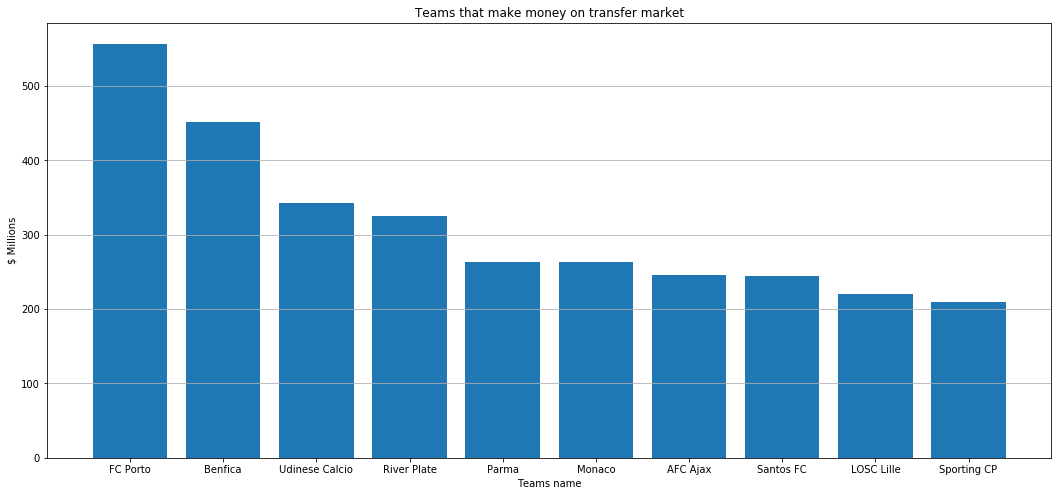

In [32]:
fig, ax = plt.subplots(figsize=(18,8))
ax.bar(make_money.index, make_money.values)
ax.set_title("Teams that make money on transfer market")
ax.set_ylabel("$ Millions")
ax.set_xlabel("Teams name")
ax.set_xticklabels(make_money.index)
plt.grid(axis='y')

#### Why Porto has the highest profit ?
 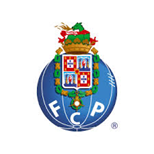
#### Certainly, the profits of this size do not come without planning, the Porto team is interested in the marketing part also to be a competing club.  Porto won the European Champions League in 2004, which made the team one of the top clubs. And contributed to highlighting a number of players.
#### Porto makes all of this from sports marketing, its scouts spread throughout the world, and they rely on the idea that young talents find it very difficult to move to a global team to show their talents, Porto opens this way for them.

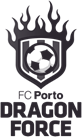

#### Porto appeared a special project for the club's academy as “Dragon Force” the opening of the Dragon Force project was on 06/09/2008. The academy has a very encouraging title which is “Preparing champions for life”, the project targets ages from 4 to 14 years. Unlike other clubs, which mostly cater for players over 18 years old.
#### Porto club for the young teams consists of 25% of the results of this project, which indicates that the project is very successful. Player training from a young age is one of the most important components of professional players. This is what benefits the club with efficient players.
#### The club is interested in three main areas of support: education, psychology and health, which is also an incentive for parents to allow their children to play football, After the age of 14, players are evaluated and then a group are selected to be registered in the club's lists for the young teams.
#### The club is not satisfied with the academy only, Also the club has 250 scouts around the world. Which is far too many compared to other big clubs, for example Manchester United has only 58 Scouts.
#### Porto club proves that allocating a budget to the academy means double financial gains in the future and a rival club as well, Porto in this period achieved 12 leagues and 1 European Champions League. 
#### A very fruitful strategy that also requires patience and effort. According to the statistic, out of 20 players will be registered in Dragon Force. Only 5 are attracted to the Sunni groups. 

### Research Question 2  (Replace this header name!)

#### Now we want to sum for each position

In [29]:
each_position_group = df.New_position.value_counts()
#print numbers for each position
print(each_position_group)

Attacker      1922
Midfield      1476
Defender      1121
Goalkeeper     180
Name: New_position, dtype: int64


#### Now we will visualize the data

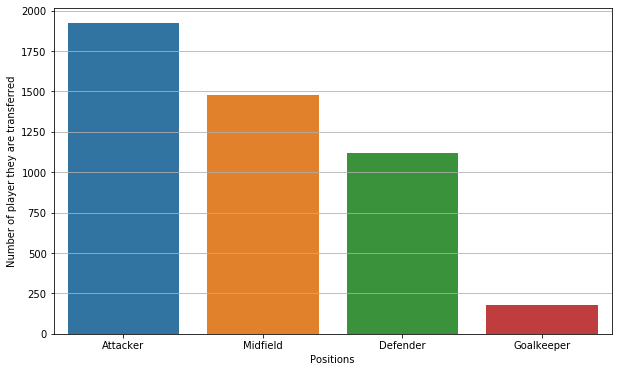

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(each_position_group.index, each_position_group.values)
ax.set_ylabel("Number of player they are transferred")
ax.set_xlabel("Positions")
plt.grid(axis='y')

### Research Question 3  (Replace this header name!)

#### Now we want to see what age is the most transferred for each season

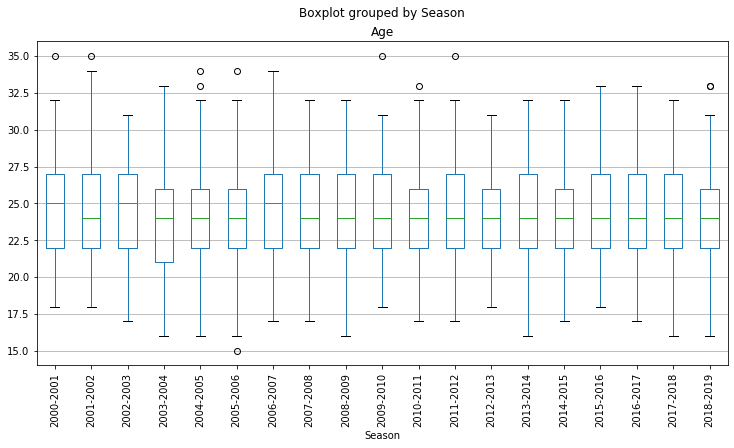

In [33]:
df.boxplot(column='Age',by = 'Season',figsize=(12,6),rot=90)
plt.grid(axis='x')

#### Here we sum transfer_fee for each age

In [37]:
trans_sum = df.groupby('Age')['Transfer_fee'].agg('sum').reset_index()
trans_sum

,Age,Transfer_fee
0,15,3200000
1,16,80700000
2,17,143640000
3,18,743810000
4,19,1565160000
5,20,2724840000
6,21,3428255000
7,22,4110520000
8,23,5042080000
9,24,5407570000


#### Now we will visualize the above data

<Figure size 1440x864 with 0 Axes>

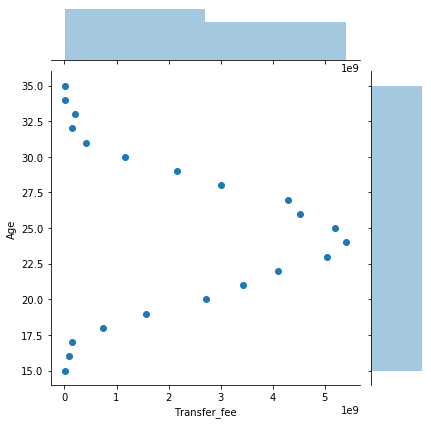

In [38]:
plt.figure(figsize=(20,12))
sns.jointplot(x= trans_sum.Transfer_fee,  y=trans_sum.Age)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

### Research Question 4  (Replace this header name!)

In [ ]:
season_wise = df_new.groupby('New_season')['Transfer_fee'].agg('sum').reset_index()
season_wise

In [ ]:
plt.figure(figsize=(16, 8))
plt.scatter( season_wise['New_season'], season_wise['Transfer_fee'], c='black')
plt.xlabel("The seasons")
plt.ylabel("Transfer_fee")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = season_wise['New_season'].values.reshape(-1,1)
Y = season_wise['Transfer_fee'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)

In [ ]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

In [ ]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter( season_wise['New_season'], season_wise['Transfer_fee'], c='black')
plt.plot(
    season_wise['New_season'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()